# Default of Credit Cards

Dataset preuzet sa [sledeceg sajta](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)
## Opis skupa podataka, atributa i problema

Varijable koje su sadrzane u skupu podataka su sledece:

1. LIMIT_BAL: Kolicina sredstava izdata kao kredit(u tajvanskim dolarima) (includes individual and family/supplementary credit
2. SEX: Pol (1=musko, 2=zensko)
3. EDUCATION: Obrazovni nivo (1=poslediplomske studije, 2=univerzitet, 3=srednja skola, 4=ostalo, 5=nepoznato, 6=nepoznato)
4. MARRIAGE: Bracni status (1=u braku, 2=, 3=ostalo)
5. AGE: Starosna dob
6. PAY_0: Status otplate u septembru, 2005 (-1=placeno u roku, 1=isplata kasni jedan mesec, 2=isplata kasni dva meseca, … 8=isplata kasni osam meseci, 9=isplata kasni devet ili vise meseci)
7. PAY_2: Status otplate u avgustu, 2005 (opseg vrednosti isto kao i kod 7.)
8. PAY_3: Status otplate u julu, 2005 (opseg vrednosti isto kao i kod 7.)
9. PAY_4: Status otplate u junu, 2005 (opseg vrednosti isto kao i kod 7.)
10. PAY_5: Status otplate u maju, 2005 (opseg vrednosti isto kao i kod 7.)
11. PAY_6: Status otplate u aprilu, 2005 (opseg vrednosti isto kao i kod 7.)
12. BILL_AMT1: Kolicina izvoda racuna u septembru, 2005 (tajvanski dolar)
13. BILL_AMT2: Kolicina izvoda racuna u avgustu, 2005 (tajvanski dolar)
14. BILL_AMT3: Kolicina izvoda racuna u julu, 2005 (tajvanski dolar)
15. BILL_AMT4: Kolicina izvoda racuna u junu, 2005 (tajvanski dolar)
16. BILL_AMT5: Kolicina izvoda racuna u maju, 2005 (tajvanski dolar)
17. BILL_AMT6: Kolicina izvoda racuna u aprilu, 2005 (tajvanski dolar)
18. PAY_AMT1: Kolicina prethodne isplate u septembru, 2005 (tajvanski dolar)
19. PAY_AMT2: Kolicina prethodne isplate u avgustu, 2005 (tajvanski dolar)
20. PAY_AMT3: Kolicina prethodne isplate u julu, 2005 (tajvanski dolar)
21. PAY_AMT4: Kolicina prethodne isplate u junu, 2005 (tajvanski dolar)
22. PAY_AMT5: Kolicina prethodne isplate u maju, 2005 (tajvanski dolar)
23. PAY_AMT6: Kolicina prethodne isplate u aprilu, 2005 (tajvanski dolar)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive
!ls UCI*

Mounted at /content/drive
/content/drive/My Drive
UCI_Credit_Card.csv


## Ucitavanje i preprocesiranje podataka
Potrebno je ucitati podatke i izvrsiti odredjenu vrstu preprocesiranja kako bi podaci ostali konzistentni u skladu sa opisom skupa atributa.


### Ucitavanje podataka

In [4]:
import pandas as pd

data = pd.read_csv("UCI_Credit_Card.csv")

### Uskladjivanje podataka
Uskladjujemo podatke u skladu sa opisom atributa

In [5]:
data = data.drop(data[(data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)| (data.MARRIAGE == 0)].index)#uklanjamo tamo gde je edukacija oznacena kao nepoznata

for index,row in data.iterrows():#potrebno je inkrementirati ove kolone u svakom redu za 1 da bi se opseg podudarao sa opisom
  data.at[index,"PAY_0"]=row["PAY_0"]+1
  data.at[index,"PAY_2"]=row["PAY_2"]+1
  data.at[index,"PAY_3"]=row["PAY_3"]+1
  data.at[index,"PAY_4"]=row["PAY_4"]+1
  data.at[index,"PAY_5"]=row["PAY_5"]+1
  data.at[index,"PAY_6"]=row["PAY_6"]+1

data = data.drop(data[
                      (data.PAY_0 == 0) | 
                      (data.PAY_2 == 0) |
                      (data.PAY_3 == 0) |
                      (data.PAY_4 == 0) |
                      (data.PAY_5 == 0) |
                      (data.PAY_6 == 0) 
                      ].index)#uklanjamo tamo gde je PAY_X oznacen kao nula, jer takvih vrednosti nemamo u opisu

### Ciscenje, enkodovanje, popunjavanje praznih vrednosti...


In [6]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Posto nema nenumerickih podataka, ne vrsimo enkodovanje


In [7]:
data.isnull().sum(axis=0) # provera da li ima nekih null/NaN vrednosti

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Nema NaN/None vrednosti, pa samim tim mozemo preskociti i zamenu ovih vrednosti

### Ekstrahovanje skupa
S obzirom da se bavimo ***unsupervised learning***-om, target kolona "***default.payment.next.month***" nam nece biti potrebna. 

In [8]:
X = data.drop(labels=["default.payment.next.month", "ID"], axis=1)
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2,90000.0,2,2,2,34,1,1,1,1,1,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,1,1,1,1,1,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1,1,2,37,1,1,1,1,1,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
6,500000.0,1,1,2,29,1,1,1,1,1,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
8,140000.0,2,3,1,28,1,1,3,1,1,...,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0


## Klasterovanje K-means metodom
Koristicemo **Kmeans** metodu za klasterovanje iz *SciKit learn*-a, kao i "***Silhouette score***" i "***Elbow score***" kao metrike.

### Skaliranje podataka

Koristicemo ***StandardScaler*** da bismo skalirali podatke i dobili sto bolje rezultate. Mozemo koristiti i *RobustScaler*, ali njegov uticaj na tzv. "outlier" slucajeve je minimalan.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

X_normalized = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.494021,0.831994,0.185241,0.849346,-0.146548,-0.19881,-0.105999,-0.069080,-0.019801,0.028566,...,-0.653994,-0.613112,-0.576913,-0.547903,-0.290477,-0.267987,-0.290504,-0.272508,-0.254055,0.035000
1,-0.811936,0.831994,0.185241,-1.079016,0.172301,-0.19881,-0.105999,-0.069080,-0.019801,0.028566,...,-0.175281,-0.413565,-0.365427,-0.332060,-0.245983,-0.220935,-0.270319,-0.262146,-0.247596,-0.229970
2,-0.811936,-1.201932,-1.252442,0.849346,0.172301,-0.19881,-0.105999,-0.069080,-0.019801,0.028566,...,-0.063855,-0.540860,-0.506408,-0.478900,-0.199828,-0.239429,-0.325122,-0.272508,-0.254055,-0.243219
3,2.764610,-1.201932,-1.252442,0.849346,-0.677964,-0.19881,-0.105999,-0.069080,-0.019801,0.028566,...,5.126258,6.926391,6.488050,6.520330,4.646471,3.222361,3.443789,1.721057,0.939356,0.615948
4,-0.096627,0.831994,1.622924,-1.079016,-0.784247,-0.19881,-0.105999,1.553552,-0.019801,0.028566,...,-0.673434,-0.643366,-0.624536,-0.730316,-0.123303,-0.403974,-0.347831,-0.272508,-0.254055,-0.229970


In [10]:
X_normalized.shape

(19496, 23)

Vidimo da imamo 19496 uzoraka sa 23 dimenzije

### Uklanjanje *outlier*-a
Posto se moze desiti da imamo tzv. "outlier" slucajeva koji mogu da nam prave problem tokom klasterovanja, odradicemo "*Z-score*" metriku koja nam kaze koliko standardnih devijacija je svaki podatak(svaka pojedinacna dimenzija jednog uzorka) udaljen od matematickog ocekivanja. Sve vrednosti vece od 3 standardne devijacije uklanjamo, jer ih uzimamo za outlier-e. 

In [11]:
from scipy import stats

X_normalized_outliered = X_normalized.loc[ ( stats.zscore(X_normalized) < 3 ).all( axis=1 ) , :] # treba absolute Z-score

In [12]:
X_normalized_outliered.shape

(17397, 23)

Primeticemo da smo pronasli skoro 2100 primera koji su (potencijalni) outlier-i i njih smo uklonili radi tacnosti naseg klasterovanja.

### K-means klastering

Posto na izlazu imamo dve vrednosti - 0 i 1, odnosno nije platio i jeste platio respektivno, koristicemo samo dva klastera. 

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X_normalized_outliered)

KMeans(n_clusters=2)

Sada mozemo prediktovati kom klasteru koji uzorak pripada i tu kolonu pripojiti nasem DataFrame-u. 

In [14]:
X_normalized_outliered['Cluster'] = model.predict(X_normalized_outliered)

X_normalized_outliered.groupby('Cluster').mean()#centri klastera

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.486172,0.116536,-0.301604,-0.118833,0.120041,-1.074662,-1.455914,-1.538644,-1.584178,-1.616696,...,-0.798520,-0.791337,-0.776946,-0.763492,-0.224465,-0.227913,-0.226432,-0.214997,-0.203044,-0.167823
1,-0.232680,-0.007072,0.064005,0.032820,-0.060938,0.184578,0.254189,0.264889,0.268423,0.275020,...,-0.002215,-0.002421,-0.002072,0.000353,-0.094640,-0.090727,-0.090486,-0.093961,-0.092552,-0.110561


Mozemo ove rezultate vizualizovati na sledeci nacin:

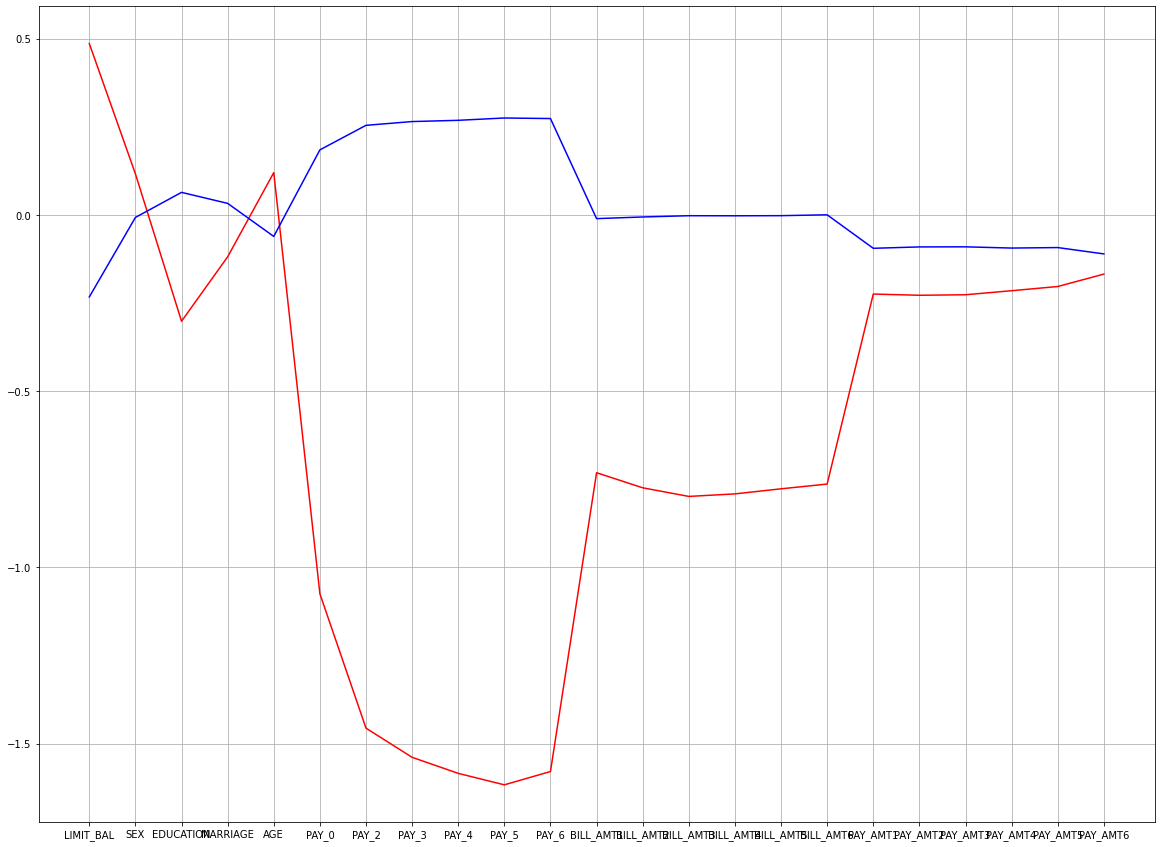

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

def plotovanje_centara(model):
  plt.figure(figsize=(20,15))
  plt.plot(model.cluster_centers_[0], c='r')
  plt.plot(model.cluster_centers_[1], c='b')

  plt.xticks(list(range(X_normalized_outliered.shape[1] - 1)), X_normalized_outliered.columns[:-1])

  plt.grid()

  plt.show()

plotovanje_centara(model)

Na apscisnoj osi nalaze se nazivi nasih obelezja, dok su na ordinati vrednosti centroida za data obelezja. 

Mozemo videti da je klaster 0 okarakterisan niskim vrednostima za PAY_x kolone, dok je klaster 1 okarakterisan visokim vrednostima za iste dimenzije.

Iduci ka atributima udesno, videcemo da se razlika izmedju ova dva klastera smanjuje drasticno za BILL_AMT vrednosti, a jos vise za PAY_AMT vrednosti, sto znaci da, koristeci iskljucivo te atribute, teze cemo razlikovati ova dva klastera. Ovaj stav takodje vazi za atribute SEX, MARRIAGE i AGE gde su vrednosti centroida priblizno slicne.  

### Scoring
Koristicemo "*Silhouette score*" metriku. Ova metrika uzima opseg vrednosti [-1,1] gde se kaze da je 1 najbolje grupisanje(teoretski), 0 da nije sigurno kom klasteru pripada dati slucaj, a vrednost -1 znaci da smo pogresno dodelili centroide.
 

In [16]:
from sklearn.metrics import silhouette_score

#Prvi argument su sve kolone osim "Cluster" kolone, drugi argument jeste cluster kolona, svi redovi ukljuceni u proces.
silhouette_score(X_normalized_outliered.iloc[:, :-1], X_normalized_outliered.iloc[:, -1])

0.2952859316054911

Dakle, za dati skup podataka i 2 klastera imamo skor od ~0.29, sto nije najbolje. Pokusajmo da optimizujemo broj klastera

### Optimizacija hiperparametara
S obzirom da imamo samo 1 hiperparametar - "*n_clusters*" tj. broj klastera potrebno je samo da pronadjemo najoptimalniji broj klastera.

Prilikom ocene koristicemo dve metrike: 

*   ***Silhouette score***
*   ***Elbow score***



In [17]:
input_data = X_normalized_outliered.iloc[:,:-1] # uzimamo podatke bez poslednje kolone("Cluster")

def izracunaj_lakat_siluetu(data):
  elbow = []
  silhouette = []
  for i in range(1,10):
    model = KMeans(n_clusters=i).fit(data)
    elbow.append(model.inertia_)
    if(i > 1):
      silhouette.append( silhouette_score(data, model.predict(data) ) )

  return {
      "elbow": elbow,
      "silhouette":silhouette
  }

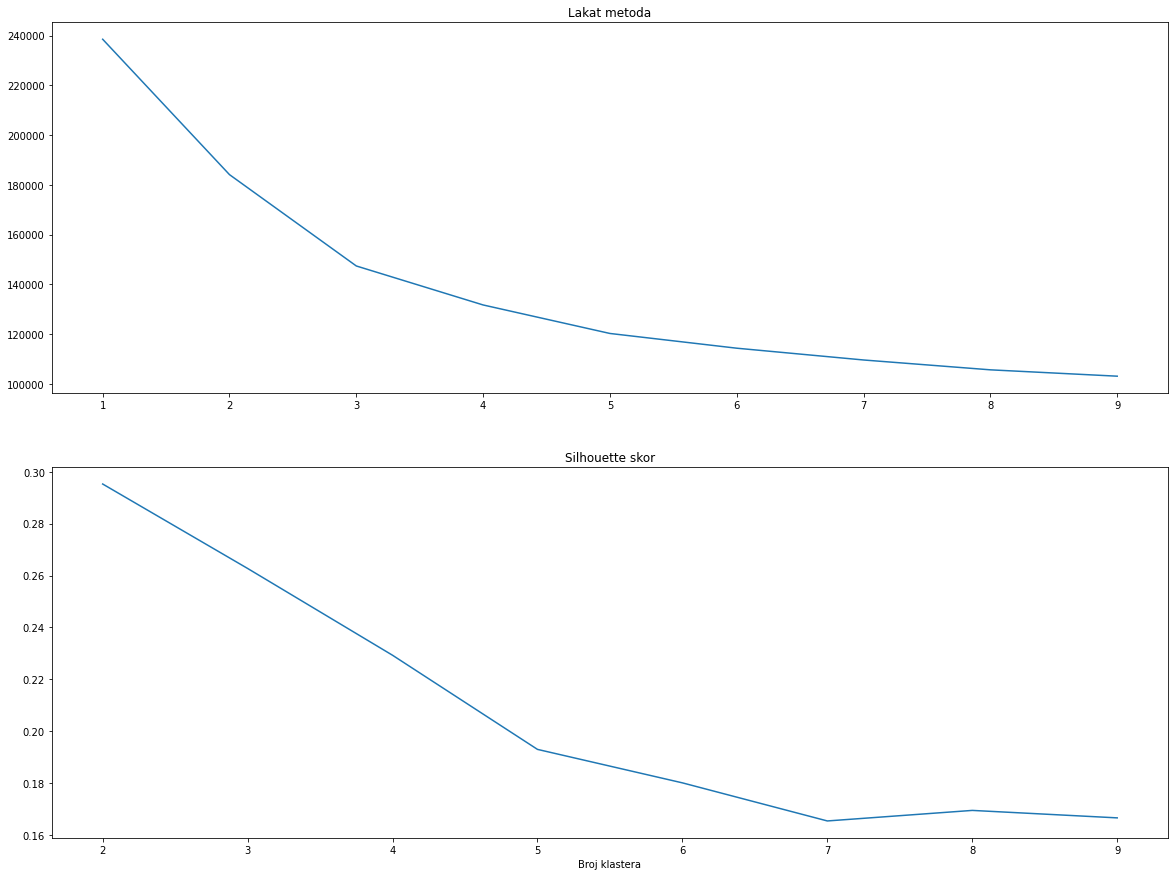

In [18]:
def plot_scores(siluete, lakat):
  x = range(2,10)
  fig, ax = plt.subplots(2, figsize=(20,15))

  ax[0].plot(range(1,10), lakat)
  ax[0].set_title("Lakat metoda")

  ax[1].plot(x, siluete)
  ax[1].set_title("Silhouette skor")

  plt.xlabel("Broj klastera")

rezultat = izracunaj_lakat_siluetu(input_data)
plot_scores(rezultat["silhouette"],rezultat["elbow"])

Metodom lakta, trazimo nagle padove("laktove") na grafiku, ocigledno je da se jedan nalazi na 2, na 3, a jedan na 5, sto znaci da bi po lakat metodi to bio najoptimalniji broj klastera.

Ako pogledamo silhouette skor, videcemo da je najoptimalniji skor pri broju klastera=2(sto je ujedno i cifra s kojom smo prvobitno radili) - tada je ***Silhouette score=0.2952859316054911***.

Posto smo inicijalno odradili najbolji siluet skor(2), odradicemo, na osnovu Elbow metode, i prikaz centara kada je broj klastera 3.

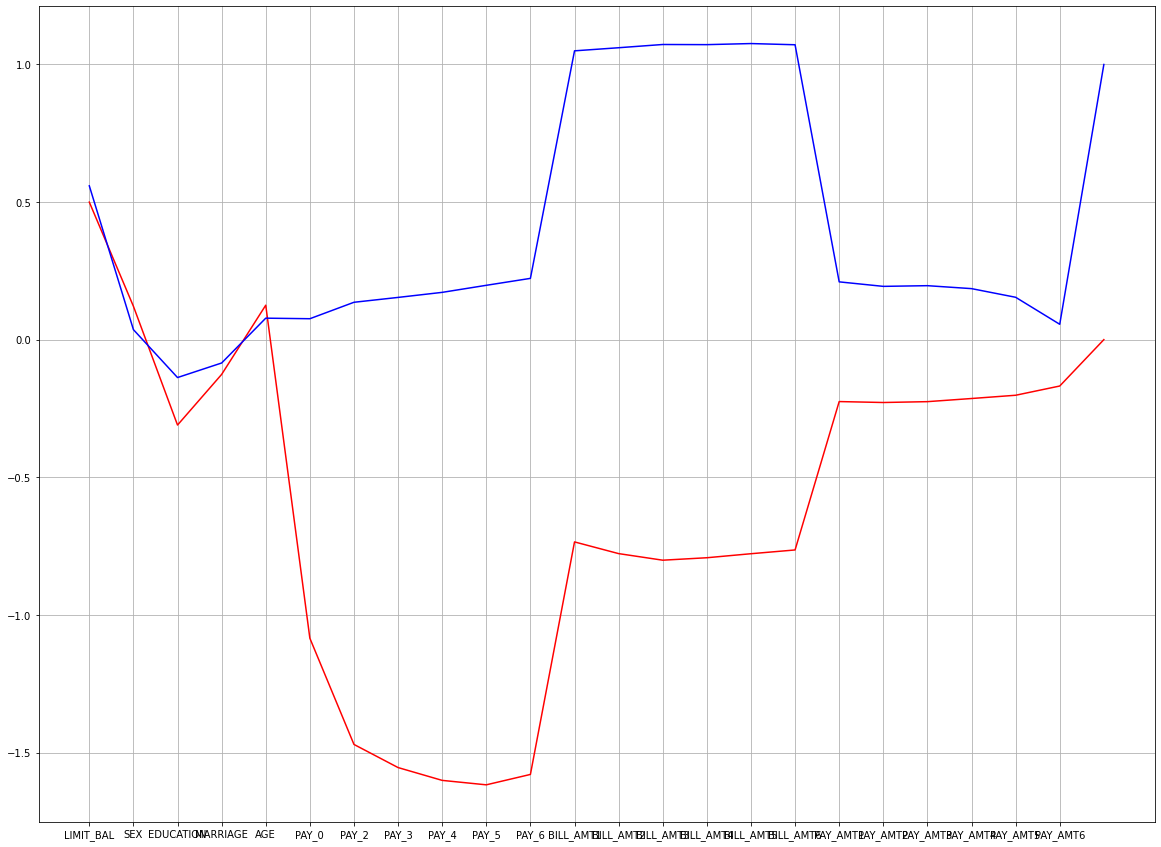

In [19]:
model = KMeans(n_clusters=3)
model.fit(X_normalized_outliered)

plotovanje_centara(model)

## Hijerarhijsko klasterovanje

Ovom metodom kreira se dendrogram koji spaja uzorke na takavn nacin da kreira hijerarhiju.

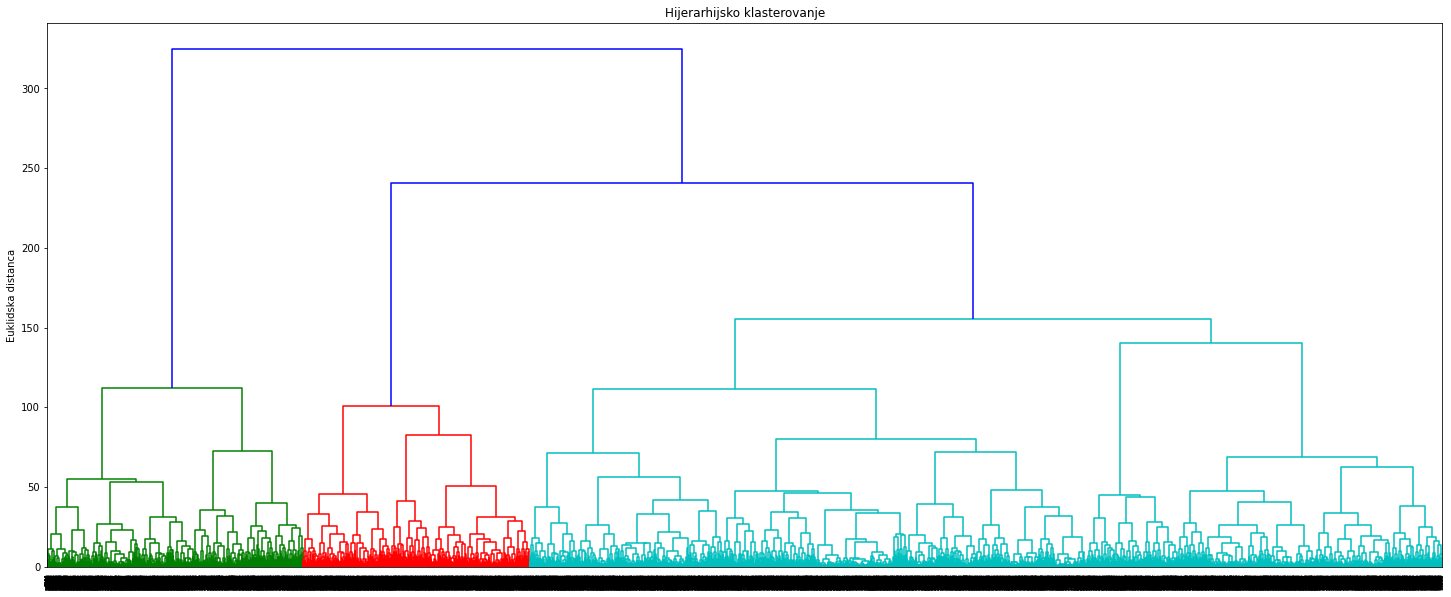

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(input_data, 'ward')#Wardov metod?

plt.figure(figsize=(25, 10))
plt.title('Hijerarhijsko klasterovanje')
plt.ylabel('Euklidska distanca')

dendrogram(Z)

plt.show()

## Aglomerativno klasterovanje

In [21]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, linkage='ward')
model.fit(input_data)

silhouette_score(input_data, model.labels_)

0.27879627135196255

In [22]:
from IPython.core.pylabtools import figsize
def izracunaj_siluetu_aglomerativno(data):
  silhouette = []
  for i in range(2,10):
    model = AgglomerativeClustering(n_clusters=i, linkage="ward").fit(data)
    silhouette.append( silhouette_score(data, model.labels_ ) )

  return silhouette

def plot_scores_aglomerativno(siluete):
  x = range(2,10)

  plt.plot(x, siluete, label="Silhouette score")

  plt.xlabel("Broj klastera")
  plt.show()

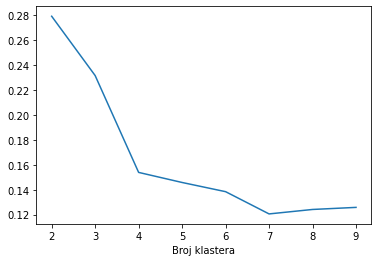

In [23]:
rezultat = izracunaj_siluetu_aglomerativno(input_data)
plot_scores_aglomerativno(rezultat)